# Linear Regression Tutorial

___
In this tutorial you will perform a linear regression and make the machine learn.  
Now, to run a code block in Jupyter Notebooks, click into it and hit ctrl + enter.  
If the key command doesn't work, hit the triangle button in the upper left.  
The first step, of course, is to load the data. We will be using a dataset of shampoo sales over 3 years.

In [6]:
import csv
import datetime as dt

with open("shampoo.csv", "r") as shamwow:
    data = list(csv.reader(shamwow))[1:]

# Convert the sales into a float
sales = [float(point[1]) for point in data]
dates = [dt.datetime.strptime("199" + point[0],'%Y-%m').date() 
         for point in data]

print(sales[0:5])
print(dates[0:2])

[266.0, 145.9, 183.1, 119.3, 180.3]
[datetime.date(1991, 1, 1), datetime.date(1991, 2, 1)]


Let's plot the data in a plot that's as scattered as my brain while writing this tutorial:

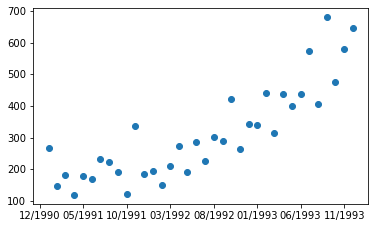

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Format X-axis properly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=5))
plt.gcf().autofmt_xdate()

# Plot with X-axis as date and Y-axis as sales
points = plt.scatter(dates, sales)

Now let's perform the actual linear regression. We're fitting the data to a line. What degree polynomial does that correspond to? Hopefully I have at least that many degrees by the time I leave college...

In [10]:
import numpy as np

# Converting the datetime objects into an integer
counter = 1
numeric_months = []
for date in dates:
    numeric_months.append(counter)
    counter += 1

# Linear regression using a polynomial of a certain degree
linear_regression = np.polyfit(numeric_months, sales, 1)

Remember like 5 years ago when you learned about slope-intercept form? Y'know, y = mx + b where m is the slope and b is the y-intercept? Don't ask me why I still remember that, but we're gonna use it now to plot the linear regression line:

<ipython-input-13-c3ceecdf4232>:11: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  plt.gca().set_xticks(ticks, formatted_dates)


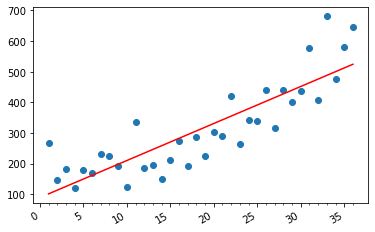

In [13]:
import matplotlib.ticker as ticker

m, b = linear_regression

# Replicate the same formatting as the dates
formatted_dates = [date.strftime('%m/%Y') for date in dates]
formatted_dates.insert(0, "12/1990")
ticks = [0] + numeric_months

# Plot with X-axis as dates
plt.gca().set_xticks(ticks, formatted_dates)
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))
points = plt.scatter(numeric_months, sales)

# One of them is the Y-intercept, and one of them is slope
#line = plt.axline((0, b), slope=m, color="red")
regression_line = np.polyval([m, b], numeric_months)
plt.plot(numeric_months, regression_line, color="red")

Congratulations, you did it! Now go to the upper left corner, hit file, press new, open a terminal, get to the right directory, and type  
`quarto render 00_core.ipynb --to docx`  

Then, simply convert it to a PDF and email it to Alejandro and CC Prof. Poshyvanyk!

References:  
Where I found the shampoo data: https://machinelearningmastery.com/time-series-datasets-for-machine-learning/  
Original Source: Makridakis, S., Wheelwright, S.C. and Hyndman, R.J. (1998) Forecasting: Methods and Applications. 3rd Edition, Wiley, New York.